# IMPORT LIBS

In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# READ DATA

In [106]:
olist_customer = pd.read_csv('olist_customers_dataset.csv')
olist_geolocation = pd.read_csv('olist_geolocation_dataset.csv')
olist_orders = pd.read_csv('olist_orders_dataset.csv')
olist_order_items = pd.read_csv('olist_order_items_dataset.csv')
olist_order_payments = pd.read_csv('olist_order_payments_dataset.csv')
olist_order_reviews = pd.read_csv('olist_order_reviews_dataset.csv')
olist_products = pd.read_csv('olist_products_dataset.csv')
olist_sellers = pd.read_csv('olist_sellers_dataset.csv')
olist_categories = pd.read_csv('product_category_name_translation.csv')

# DATA CLEANING

In [107]:
print(f'First observation was in: \
{olist_orders["order_purchase_timestamp"].min()}')
print(f'Last observation was in: \
{olist_orders["order_purchase_timestamp"].max()}')

First observation was in: 2016-09-04 21:15:19
Last observation was in: 2018-10-17 17:30:18


In [108]:
#dropna at olist_orders
olist_orders.drop_duplicates(subset='order_id', inplace=True)

In [109]:
#
olist_order_items['shipping_limit_date'] = olist_order_items['shipping_limit_date'].astype('datetime64[ns]')
olist_order_items['shipping_limit_date'].head()

0   2017-09-19 09:45:35
1   2017-05-03 11:05:13
2   2018-01-18 14:48:30
3   2018-08-15 10:10:18
4   2017-02-13 13:57:51
Name: shipping_limit_date, dtype: datetime64[ns]

In [110]:
#dropna at olist_order_reviews
olist_order_reviews.drop_duplicates(subset='review_id', inplace=True)

In [111]:
#transfom data to date_time
datetime_columns = ['review_creation_date','review_answer_timestamp']

for column in datetime_columns:
  olist_order_reviews[column] = pd.to_datetime(olist_order_reviews[column])     

In [112]:
datetime_columns = ['order_purchase_timestamp','order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']

for column in datetime_columns:
  olist_orders[column] = pd.to_datetime(olist_orders[column])

In [113]:
#transfer data to date_time
olist_orders['year'] = olist_orders['order_purchase_timestamp'].dt.year
olist_orders['month'] = olist_orders['order_purchase_timestamp'].dt.month
olist_orders['date'] = olist_orders['order_purchase_timestamp'].dt.day.astype("Int64")

In [114]:
olist_products.rename(columns={'product_name_lenght': 'product_name_length', 'product_description_lenght': 'product_description_length'}, inplace=True)

In [115]:
olist_products['product_name_length'].fillna(olist_products['product_name_length'].mean(), inplace=True)
olist_products['product_description_length'].fillna(olist_products['product_description_length'].mean(), inplace=True)
olist_products['product_photos_qty'].fillna(olist_products['product_photos_qty'].mean(), inplace=True)
olist_products['product_weight_g'].fillna(olist_products['product_weight_g'].mean(), inplace=True)
olist_products['product_length_cm'].fillna(olist_products['product_length_cm'].mean(), inplace=True)
olist_products['product_height_cm'].fillna(olist_products['product_height_cm'].mean(), inplace=True)
olist_products['product_width_cm'].fillna(olist_products['product_width_cm'].mean(), inplace=True)

# MERGE DATA

In [116]:
# products & product_category
df_product_categories = pd.merge(
    left=olist_products,
    right=olist_categories,
   how='outer',
  left_on='product_category_name',
 right_on='product_category_name'
)

In [117]:
#order_items & order_payment
df_orders = pd.merge(
    left=olist_order_items,
    right=olist_order_payments,
    how='outer',
    left_on='order_id',
    right_on='order_id'
)


In [118]:
#orders & product_categories
df_order_product = pd.merge(
    left=df_orders,
    right=df_product_categories,
    how='outer',
    left_on='product_id',
    right_on='product_id'
)

In [119]:
#orders & customers
df_orders_customers = pd.merge(
    left=olist_orders,
    right=olist_customer,
    how='outer',
    left_on='customer_id',
    right_on='customer_id'
)


In [120]:
df = pd.merge(
    left=df_order_product,
   right=df_orders_customers,
    how='left',
    left_on='order_id',
    right_on='order_id'
)


In [121]:
df.dropna(inplace=True)

In [122]:
df.isnull().sum()

order_id                         0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
product_category_name            0
product_name_length              0
product_description_length       0
product_photos_qty               0
product_weight_g                 0
product_length_cm                0
product_height_cm                0
product_width_cm                 0
product_category_name_english    0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
year                             0
month               

In [123]:
#Describptive Analysis of Brazilian Ecommerce Olist Dataset
df.describe()

,order_item_id,shipping_limit_date,price,freight_value,payment_sequential,payment_installments,payment_value,product_name_length,product_description_length,product_photos_qty,...,product_width_cm,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,year,month,date,customer_zip_code_prefix
count,113368.000000,113368,113368.000000,113368.000000,113368.000000,113368.000000,113368.000000,113368.000000,113368.000000,113368.000000,...,113368.000000,113368,113368,113368,113368,113368,113368.000000,113368.000000,113368.0,113368.000000
mean,1.196854,2018-01-08 04:26:17.802360320,120.177066,20.024293,1.089946,2.942594,172.237791,48.800526,785.795445,2.209248,...,23.099695,2018-01-01 13:57:52.791431424,2018-01-02 00:23:55.831099136,2018-01-04 20:37:23.921723904,2018-01-14 01:30:11.562777600,2018-01-25 09:58:34.134500096,2017.542534,6.038468,15.554195,35082.345071
min,1.000000,2016-10-08 10:34:01,0.850000,0.000000,1.000000,0.000000,0.000000,5.000000,4.000000,1.000000,...,6.000000,2016-10-03 09:44:50,2016-10-04 09:43:32,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-10-27 00:00:00,2016.000000,1.000000,1.0,1003.000000
25%,1.000000,2017-09-20 20:10:18,39.900000,13.080000,1.000000,1.000000,61.000000,42.000000,346.000000,1.000000,...,15.000000,2017-09-13 19:20:49.750000128,2017-09-14 03:04:51,2017-09-15 22:11:00,2017-09-25 19:59:57.750000128,2017-10-05 00:00:00,2017.000000,3.000000,8.0,11320.000000
50%,1.000000,2018-01-26 14:51:56.500000,74.900000,16.320000,1.000000,2.000000,108.140000,52.000000,601.000000,1.000000,...,20.000000,2018-01-20 15:43:27.500000,2018-01-20 22:41:07,2018-01-24 13:37:01.500000,2018-02-02 16:26:08,2018-02-16 00:00:00,2018.000000,6.000000,16.0,24325.000000
75%,1.000000,2018-05-10 21:30:33.500000,133.717500,21.200000,1.000000,4.000000,189.370000,57.000000,985.000000,3.000000,...,30.000000,2018-05-05 17:32:05.750000128,2018-05-06 08:20:12.750000128,2018-05-08 14:35:00,2018-05-15 21:21:27,2018-05-28 00:00:00,2018.000000,8.000000,23.0,58780.000000
max,21.000000,2020-04-09 22:35:08,6735.000000,409.680000,26.000000,24.000000,13664.080000,76.000000,3992.000000,20.000000,...,118.000000,2018-08-29 15:00:37,2018-08-29 15:10:26,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-10-25 00:00:00,2018.000000,12.000000,31.0,99980.000000
std,0.701322,NaN,182.793493,15.753267,0.682117,2.777913,266.627878,10.018626,651.015451,1.720301,...,11.741236,NaN,NaN,NaN,NaN,NaN,0.504086,3.221644,8.666377,29845.780275


# EDA

## 1: What is the total revenue generated by Olist, and how has it changed over time?

In [124]:
filtered_data = olist_orders[(olist_orders['year'] >= 2016) & (olist_orders['year'] <= 2018)]

In [125]:
merged_data = pd.merge(olist_order_items, filtered_data, on='order_id')
merged_data['total_revenue'] = merged_data['price'] + merged_data['freight_value']

In [126]:
revenue_over_time = merged_data.groupby(['month'])['total_revenue'].sum().reset_index()


Text(0.5, 1.0, 'Total Revenue Generated by Month')

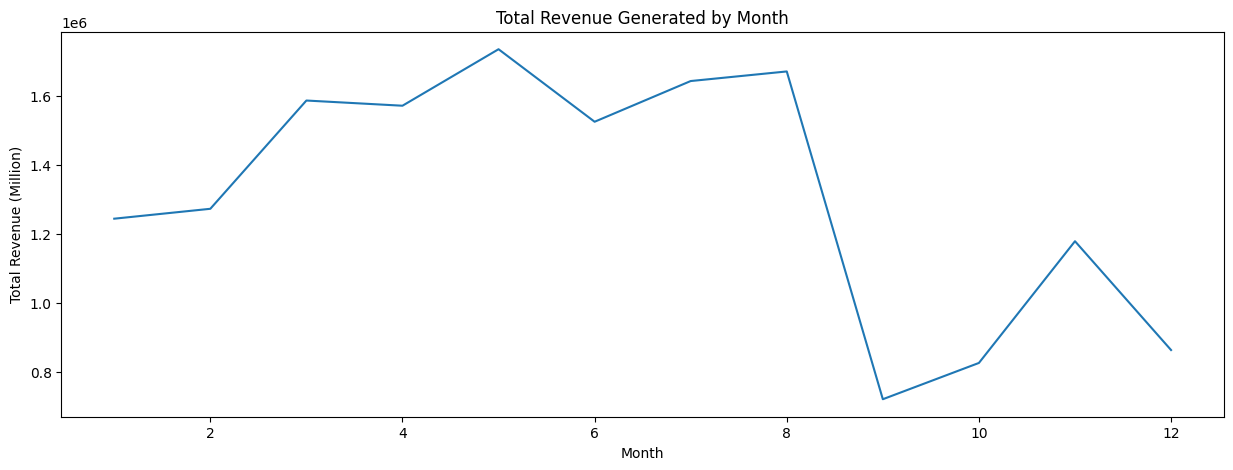

In [127]:
plt.figure(figsize=(15,5))
sns.lineplot(data=revenue_over_time, x='month',y='total_revenue')

plt.xlabel('Month')
plt.ylabel('Total Revenue (Million)')
plt.title('Total Revenue Generated by Month')

In [128]:
revenue_over_year = merged_data.groupby(['year'])['total_revenue'].sum().reset_index()
revenue_over_year

,year,total_revenue
0,2016,57183.21
1,2017,7142672.43
2,2018,8643697.60


Text(0.5, 1.0, 'Total Revenue by Year')

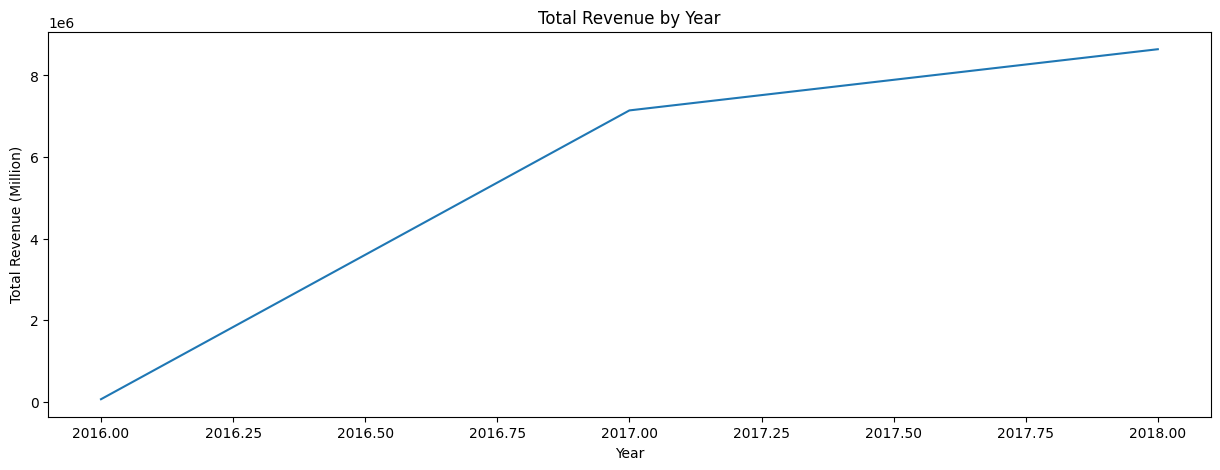

In [129]:
plt.figure(figsize=(15,5))
sns.lineplot(data=revenue_over_year, x='year',y='total_revenue')

plt.xlabel('Year')
plt.ylabel('Total Revenue (Million)')
plt.title('Total Revenue by Year')

## 2:Total Orders on E-Commerce by status

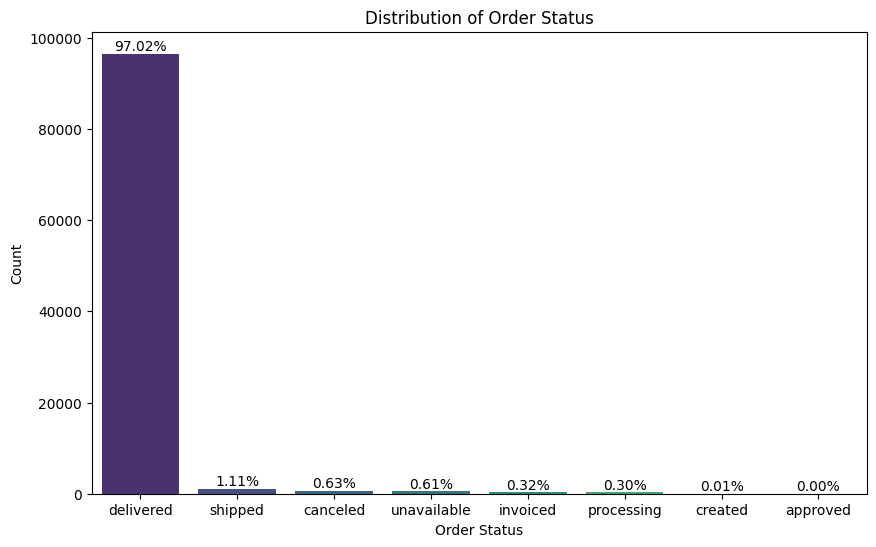

In [130]:
order_status_counts = olist_orders['order_status'].value_counts()

# Calculate percentages
order_status_percentages = order_status_counts / order_status_counts.sum() * 100

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=order_status_counts.index, y=order_status_counts.values, palette='viridis')

# Add percentages above the bars
for i, percentage in enumerate(order_status_percentages):
    plt.text(i, order_status_counts[i] + 0.5, f'{percentage:.2f}%', ha='center', va='bottom')

# Set plot labels and title
plt.xlabel('Order Status')
plt.ylabel('Count')
plt.title('Distribution of Order Status')

# Show the plot
plt.show()


## 3: Is there any growing trend on brazilian e-commerce

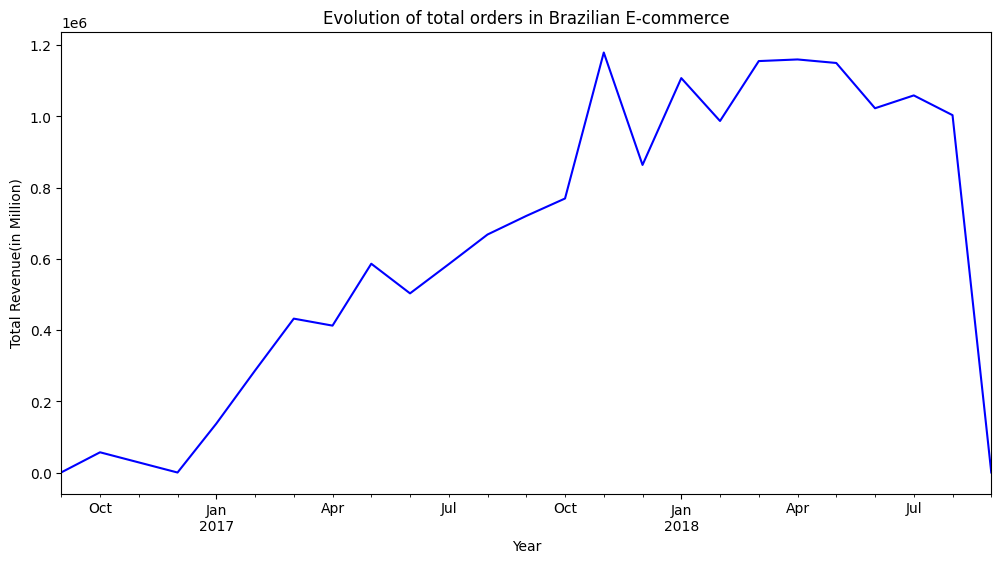

In [131]:
# Group by date and calculate total revenue
revenue_over_trend = merged_data.groupby(merged_data['order_purchase_timestamp'].dt.to_period("M"))['total_revenue'].sum()

# Plot the total revenue over time
plt.figure(figsize=(12, 6))
revenue_over_trend.plot(kind='line', color='b')

# Set plot labels and title
plt.xlabel('Year')
plt.ylabel('Total Revenue(in Million)')
plt.title('Evolution of total orders in Brazilian E-commerce')

# Show the plot
plt.show()


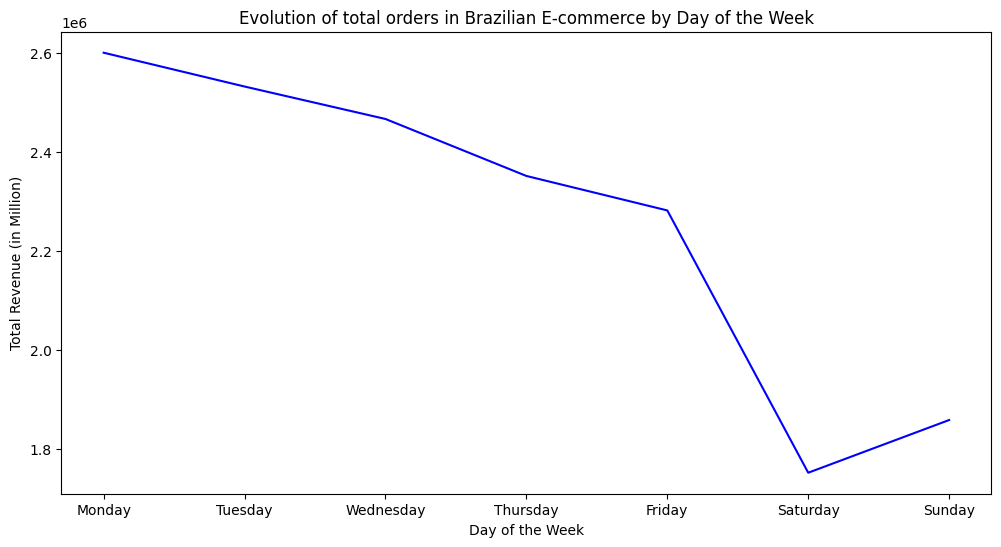

In [132]:
# Group by day of the week and calculate total revenue
revenue_over_trend = merged_data.groupby(merged_data['order_purchase_timestamp'].dt.day_name())['total_revenue'].sum()

# Order the days of the week
order_day = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Plot the total revenue over the days of the week
plt.figure(figsize=(12, 6))
revenue_over_trend[order_day].plot(kind='line', color='b')



# Set plot labels and title
plt.xlabel('Day of the Week')
plt.ylabel('Total Revenue (in Million)')
plt.title('Evolution of total orders in Brazilian E-commerce by Day of the Week')

# Show the plot
plt.show()


## 4: What are the most popular product categories on Olist, and how do their sales volumes

In [133]:
top_categories = df.groupby(by=['product_category_name_english']).agg({
    'payment_value':'sum',
    'product_category_name_english': 'count'

})
top_categories.rename(columns={
    'payment_value':'revenue',
    'product_category_name_english': 'category_count'

}, inplace=True)


top_categories = top_categories.sort_values(by='revenue', ascending=False).reset_index().head(20)
top_categories

,product_category_name_english,revenue,category_count
0,bed_bath_table,1692557.09,11649
1,health_beauty,1620868.35,9761
2,computers_accessories,1549252.47,7897
3,furniture_decor,1393972.04,8553
4,watches_gifts,1387046.31,6063
5,sports_leisure,1349194.08,8731
6,housewares,1069787.97,7172
7,auto,833610.84,4283
8,garden_tools,810460.70,4463
9,cool_stuff,744339.94,3904


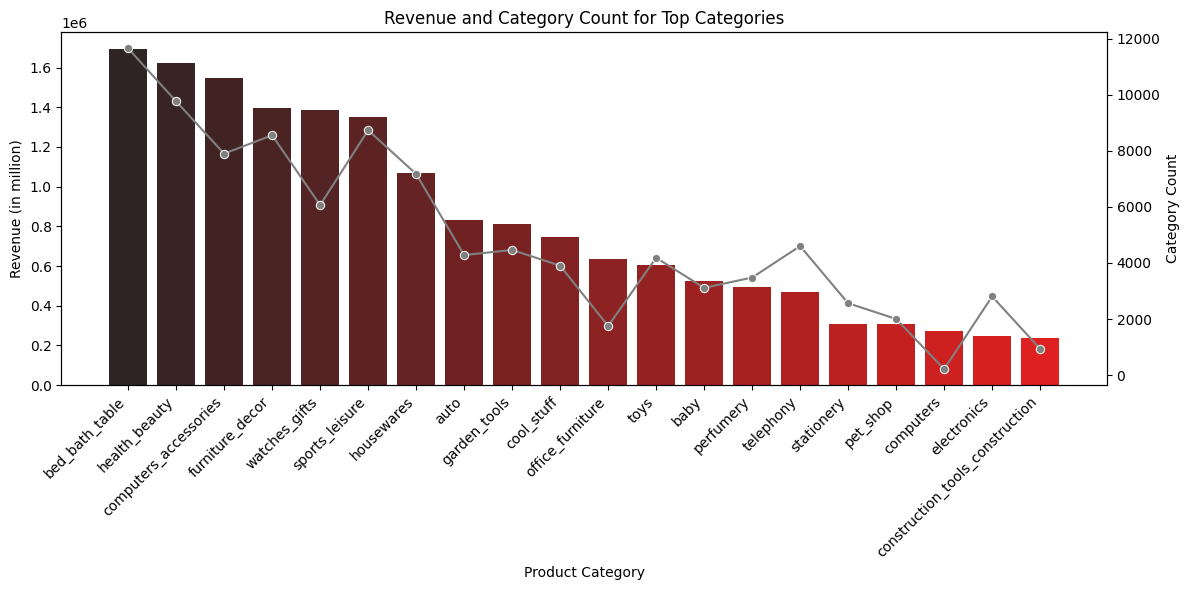

In [134]:
ax1 = sns.set_style(style=None, rc=None )

fig, ax1 = plt.subplots(figsize=(12,6))
sns.barplot(x='product_category_name_english', y='revenue', data=top_categories,palette='dark:red')
ax2 = ax1.twinx()

sns.lineplot(x='product_category_name_english', y='category_count', data=top_categories, marker='o',color='grey')


ax1.set_xlabel('Product Category')
ax1.set_ylabel('Revenue (in million)')
ax2.set_ylabel('Category Count')
plt.title('Revenue and Category Count for Top Categories')

# Customize the x-axis labels for better visibility
ax1.set_xticklabels(top_categories['product_category_name_english'], rotation=45, ha='right')

# Adjust layout to prevent clipping of labels
plt.tight_layout()

# Show the plot
plt.show()


## 5: level of satisfation

In [135]:
# Assuming 'olist_order_reviews' DataFrame is available

# Define a function to categorize satisfaction levels
def categorize_satisfaction(score):
    if score == 1.0:
        return 'very dissatisfied'
    elif score == 2.0:
        return 'dissatisfied'
    elif score == 3.0:
        return 'neutral'
    elif score == 4.0:
        return 'satisfied'
    else:
        return 'very satisfied'

# Create a new column 'level_satisfaction' based on the 'review_score'
olist_order_reviews['level_satisfaction'] = olist_order_reviews['review_score'].apply(categorize_satisfaction)



In [136]:
order = ['very dissatisfied', 'dissatisfied','neutral','satisfied','very satisfied']

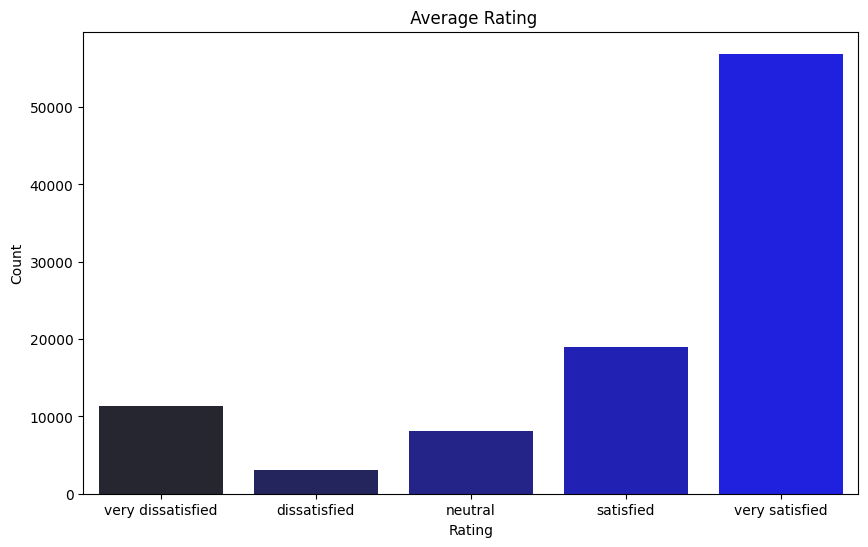

In [137]:
plt.figure(figsize=(10, 6))
sns.countplot(x='level_satisfaction', data=olist_order_reviews,order = order ,palette='dark:blue')

# Set plot labels and title
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title(' Average Rating')

# Show the plot
plt.show()


## 6: Payment Type Analysis

In [138]:
olist_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
 8   year                           99441 non-null  int32         
 9   month                          99441 non-null  int32         
 10  date                           99441 non-null  Int64         
dtypes: Int64(1), da

In [139]:
df_payment_type = pd.merge(olist_orders, olist_order_payments, on='order_id')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


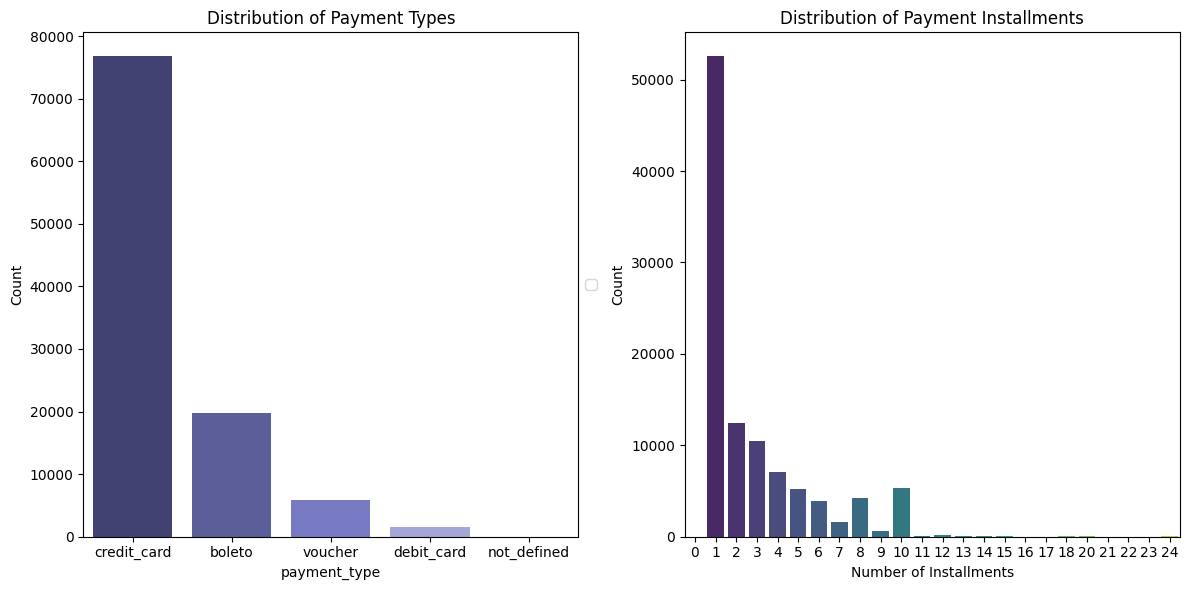

In [140]:
payment_type_counts = olist_order_payments['payment_type'].value_counts()

# Count the occurrences of each number of payment installments
payment_installments_counts = olist_order_payments['payment_installments'].value_counts()

# Plot a pie chart for payment types
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(x=payment_type_counts.index, y=payment_type_counts.values, palette='tab20b')
plt.title('Distribution of Payment Types')
plt.ylabel('Count')

plt.legend(bbox_to_anchor=(1, 0.5), loc="center left")
# Plot a bar plot for payment installments
plt.subplot(1, 2, 2)
sns.barplot(x=payment_installments_counts.index, y=payment_installments_counts.values, palette='viridis')
plt.title('Distribution of Payment Installments')
plt.xlabel('Number of Installments')
plt.ylabel('Count')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

## 7: Count order and revenue over year

In [141]:
merged_data['order_purchase_year_month'] = merged_data['order_purchase_timestamp'].dt.to_period("M")


In [142]:
summary_by_year = merged_data.groupby('order_purchase_year_month').agg({
    'order_id': 'nunique',
    'total_revenue': 'sum'
}).reset_index()
summary_by_year.set_index('order_purchase_year_month', inplace=True)
summary_by_year

,order_id,total_revenue
order_purchase_year_month,,
2016-09,3,354.75
2016-10,308,56808.84
2016-12,1,19.62
2017-01,789,137188.49
2017-02,1733,286280.62
2017-03,2641,432048.59
2017-04,2391,412422.24
2017-05,3660,586190.95
2017-06,3217,502963.04


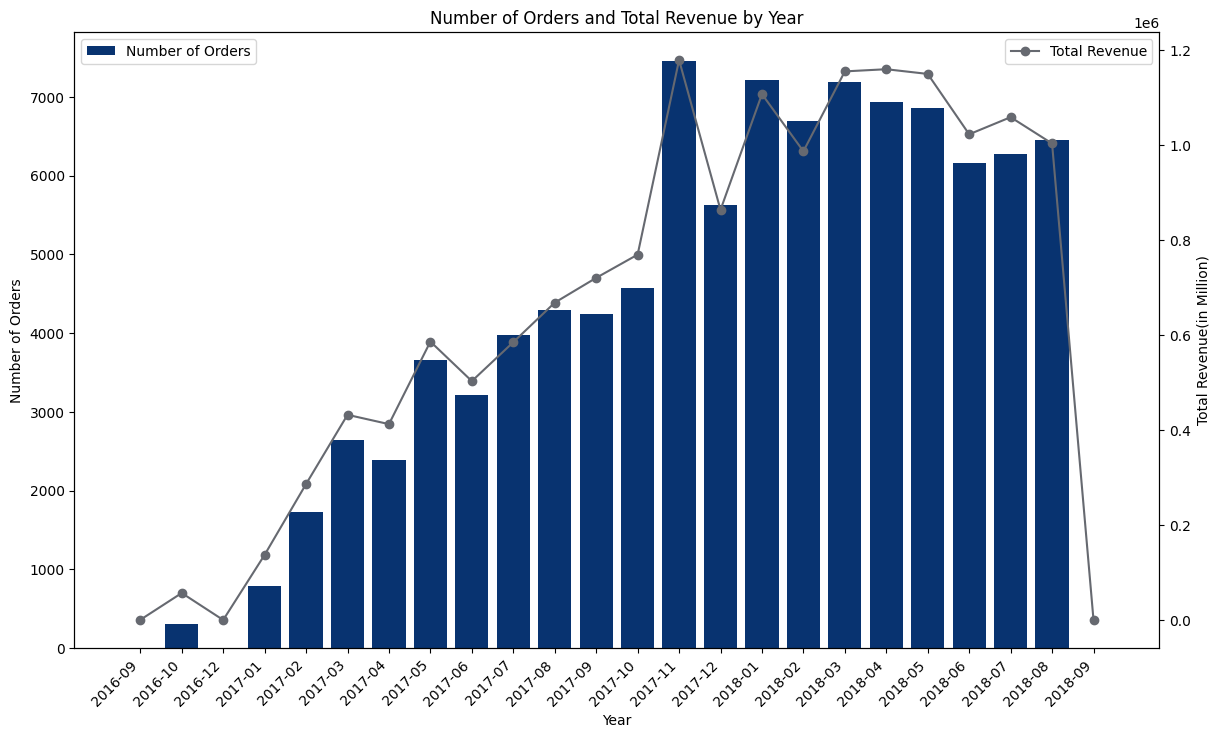

In [143]:
#add color
magma_cmap = sns.color_palette("cividis", as_cmap=True)
# Plot the combined bar plot
fig, ax1 = plt.subplots(figsize=(14, 8))

# Bar plot for the number of orders
ax1.bar(summary_by_year.index.astype(str), summary_by_year['order_id'], color=plt.cm.cividis(0.1), label='Number of Orders')
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Orders')
ax1.tick_params('y')

ax1.legend(loc='upper left')
plt.xticks(rotation=45, ha='right')

# Create a second y-axis for total revenue
ax2 = ax1.twinx()
ax2.plot(summary_by_year.index.astype(str), summary_by_year['total_revenue'], color=plt.cm.cividis(0.4), marker='o', label='Total Revenue')
ax2.set_ylabel('Total Revenue(in Million)')
ax2.tick_params('y')
ax2.legend(loc='upper right')

# Set plot title
plt.title('Number of Orders and Total Revenue by Year')

# Show the plot
plt.show()


## 8: Number of orders per state

Text(0.5, 0, 'State')

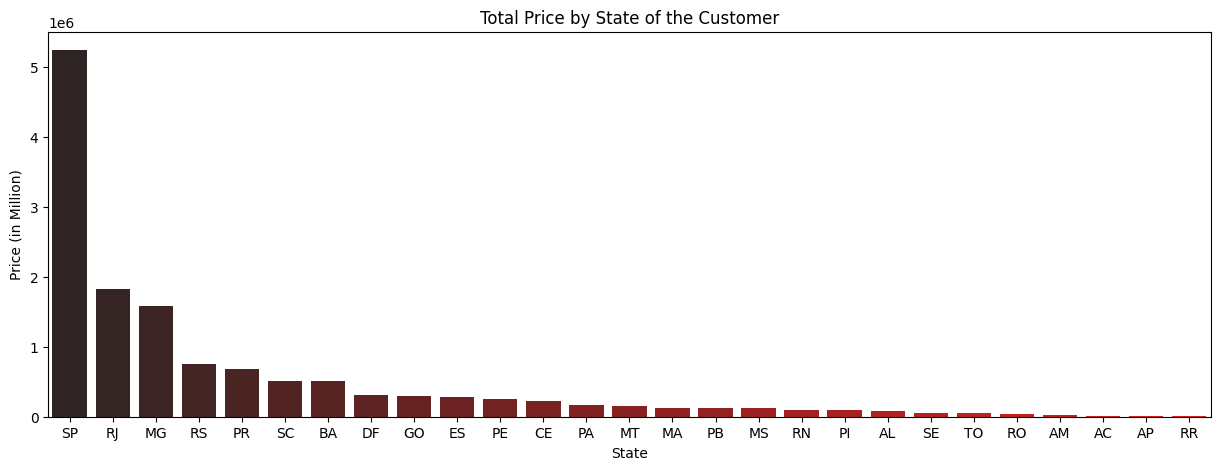

In [144]:
totalByState = df.groupby('customer_state')['price'].sum().sort_values(ascending=False)

plt.figure(figsize=(15,5))
plt.title('Total Price by State of the Customer')
sns.barplot(x=totalByState.index, y=totalByState,palette='dark:red')
plt.ylabel('Price (in Million)')
plt.xlabel('State')

Text(0.5, 0, 'State')

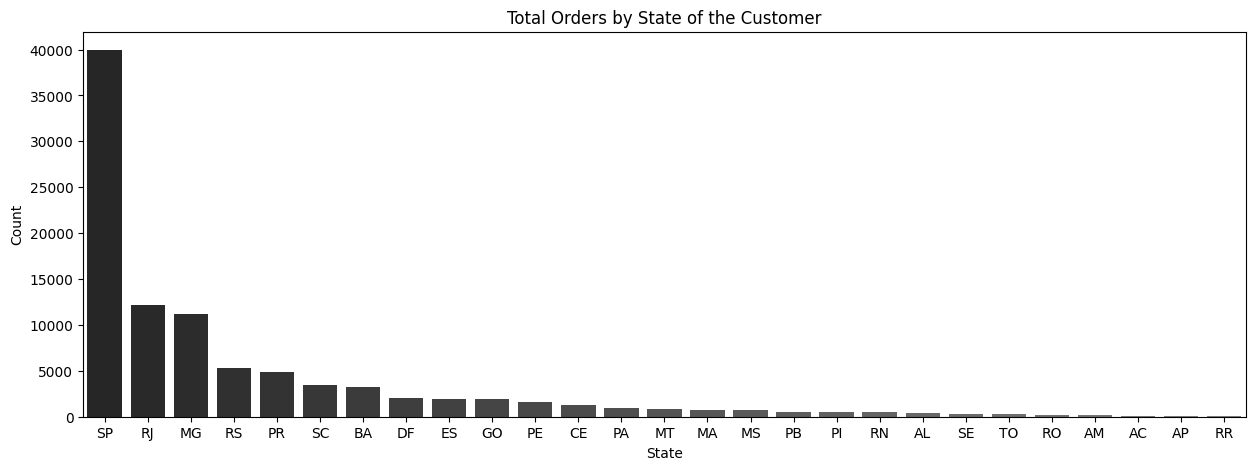

In [145]:
totalOrdersByState = df.groupby('customer_state')['order_id'].nunique().sort_values(ascending=False)
totalOrdersByState

plt.figure(figsize=(15,5))
plt.title('Total Orders by State of the Customer')
sns.barplot(x=totalOrdersByState.index, y=totalOrdersByState,palette='dark:gray')
plt.ylabel('Count')
plt.xlabel('State')

Text(0.5, 0, 'State')

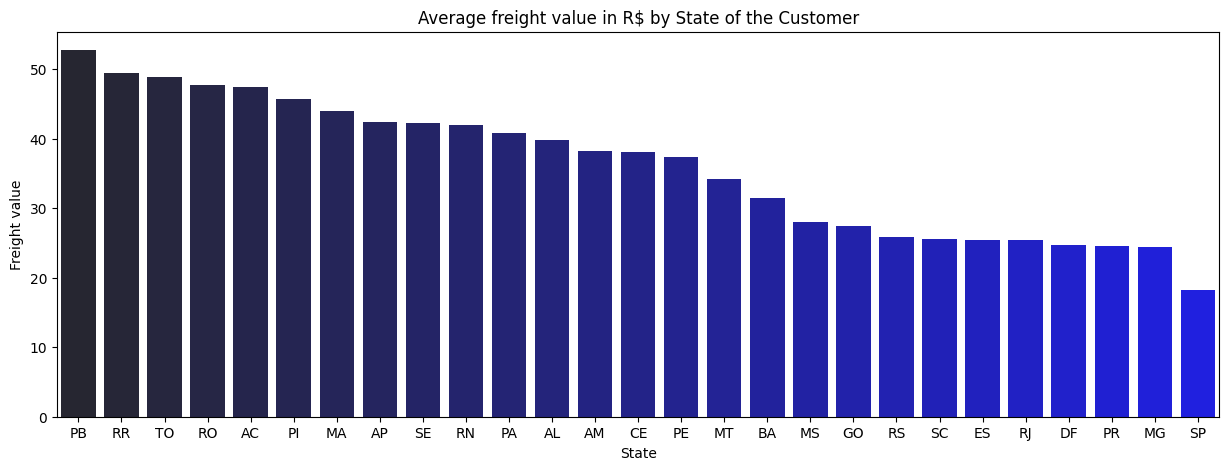

In [146]:
freightAvgState = (df.groupby('customer_state')['freight_value'].sum() /df.groupby('customer_state')['order_id'].nunique()).sort_values(ascending=False)

plt.figure(figsize=(15,5))
plt.title('Average freight value in R$ by State of the Customer')
sns.barplot(x=freightAvgState.index, y=freightAvgState,palette='dark:blue')
plt.ylabel('Freight value')
plt.xlabel('State')

## 9: AVERAGE DELIVERY TIME

In [147]:
olist_orders['delivery_time'] = (olist_orders['order_delivered_customer_date'] - olist_orders['order_approved_at']).dt.total_seconds() / 86400
olist_orders['estimated_delivery_time'] = (olist_orders['order_estimated_delivery_date'] - olist_orders['order_approved_at']).dt.total_seconds() / 86400

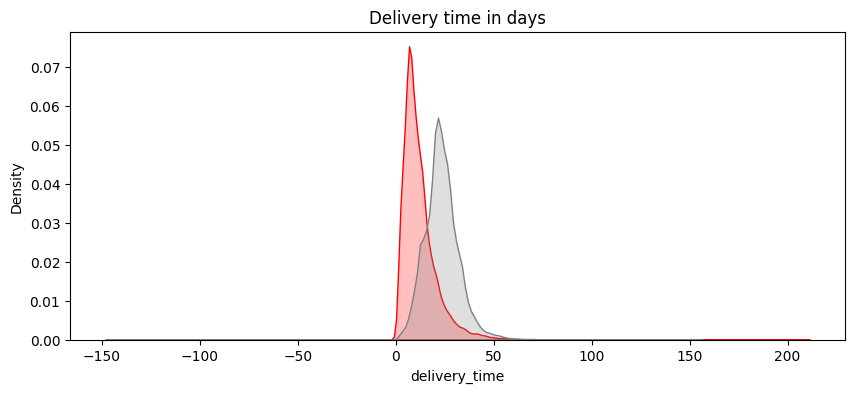

In [148]:
# Delivery estimated time and actual delivery time
plt.figure(figsize=(10,4))
plt.title("Delivery time in days")
ax1 = sns.kdeplot(olist_orders['delivery_time'].dropna(), color="red", label='Delivery time', fill=True)
ax2 = sns.kdeplot(olist_orders['estimated_delivery_time'].dropna(), color="grey", label='Estimated delivery time',fill=True)

# RFM Olist

## RFM analysis

In [149]:
import datetime as dt
import warnings
warnings.filterwarnings("ignore")

In [150]:
datasets = [olist_customer, olist_geolocation, olist_order_items, olist_order_payments, olist_order_reviews, olist_orders, olist_products, olist_sellers, olist_categories]
titles = ["customers", "geolocation", "items", "payments", "reviews", "orders", "products", "sellers", "category_translation"]

data_summary = pd.DataFrame({},)
data_summary['datasets']= titles
data_summary['columns'] = [', '.join([col for col, null in data.isnull().sum().items() ]) for data in datasets]
data_summary['total_rows']= [data.shape[0] for data in datasets]
data_summary['total_cols']= [data.shape[1] for data in datasets]
data_summary['total_duplicate']= [len(data[data.duplicated()]) for data in datasets]
data_summary['total_null']= [data.isnull().sum().sum() for data in datasets]
data_summary['null_cols'] = [', '.join([col for col, null in data.isnull().sum().items() if null > 0]) for data in datasets]
data_summary.style.background_gradient(cmap='YlGnBu')

,datasets,columns,total_rows,total_cols,total_duplicate,total_null,null_cols
0,customers,"customer_id, customer_unique_id, customer_zip_code_prefix, customer_city, customer_state",99441,5,0,0,
1,geolocation,"geolocation_zip_code_prefix, geolocation_lat, geolocation_lng, geolocation_city, geolocation_state",1000163,5,261831,0,
2,items,"order_id, order_item_id, product_id, seller_id, shipping_limit_date, price, freight_value",112650,7,0,0,
3,payments,"order_id, payment_sequential, payment_type, payment_installments, payment_value",103886,5,0,0,
4,reviews,"review_id, order_id, review_score, review_comment_title, review_comment_message, review_creation_date, review_answer_timestamp, level_satisfaction",98410,8,0,144633,"review_comment_title, review_comment_message"
5,orders,"order_id, customer_id, order_status, order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date, year, month, date, delivery_time, estimated_delivery_time",99441,13,0,8047,"order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, delivery_time, estimated_delivery_time"
6,products,"product_id, product_category_name, product_name_length, product_description_length, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm",32951,9,0,610,product_category_name
7,sellers,"seller_id, seller_zip_code_prefix, seller_city, seller_state",3095,4,0,0,
8,category_translation,"product_category_name, product_category_name_english",71,2,0,0,


In [151]:
for i in datasets:
    i.dropna(inplace=True)


In [152]:
for i in datasets:
    i.drop(i[i.duplicated()].index, axis=0, inplace=True)

In [153]:
merged_df= pd.merge(olist_customer, olist_orders, on="customer_id")
merged_df= merged_df.merge(olist_order_reviews, on="order_id")
merged_df= merged_df.merge(olist_order_items, on="order_id")
merged_df= merged_df.merge(olist_products, on="product_id")
merged_df= merged_df.merge(olist_order_payments, on="order_id")
merged_df= merged_df.merge(olist_sellers, on='seller_id')
merged_df= merged_df.merge(olist_categories, on='product_category_name')
merged_df.shape

(11546, 46)

In [154]:
merged_df.isnull().sum()

customer_id                      0
customer_unique_id               0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
order_id                         0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
year                             0
month                            0
date                             0
delivery_time                    0
estimated_delivery_time          0
review_id                        0
review_score                     0
review_comment_title             0
review_comment_message           0
review_creation_date             0
review_answer_timestamp          0
level_satisfaction               0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price               

In [155]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11546 entries, 0 to 11545
Data columns (total 46 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer_id                    11546 non-null  object        
 1   customer_unique_id             11546 non-null  object        
 2   customer_zip_code_prefix       11546 non-null  int64         
 3   customer_city                  11546 non-null  object        
 4   customer_state                 11546 non-null  object        
 5   order_id                       11546 non-null  object        
 6   order_status                   11546 non-null  object        
 7   order_purchase_timestamp       11546 non-null  datetime64[ns]
 8   order_approved_at              11546 non-null  datetime64[ns]
 9   order_delivered_carrier_date   11546 non-null  datetime64[ns]
 10  order_delivered_customer_date  11546 non-null  datetime64[ns]
 11  order_estimated

In [156]:
time_columns= ['order_purchase_timestamp', 'order_approved_at','order_delivered_carrier_date','order_delivered_customer_date',
               'order_estimated_delivery_date', 'review_creation_date', 'review_answer_timestamp', 'shipping_limit_date']

In [157]:
sp_data=merged_df[merged_df.customer_state=='SP']

In [158]:
merged_df[time_columns]=merged_df[time_columns].apply(pd.to_datetime)
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11546 entries, 0 to 11545
Data columns (total 46 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer_id                    11546 non-null  object        
 1   customer_unique_id             11546 non-null  object        
 2   customer_zip_code_prefix       11546 non-null  int64         
 3   customer_city                  11546 non-null  object        
 4   customer_state                 11546 non-null  object        
 5   order_id                       11546 non-null  object        
 6   order_status                   11546 non-null  object        
 7   order_purchase_timestamp       11546 non-null  datetime64[ns]
 8   order_approved_at              11546 non-null  datetime64[ns]
 9   order_delivered_carrier_date   11546 non-null  datetime64[ns]
 10  order_delivered_customer_date  11546 non-null  datetime64[ns]
 11  order_estimated

In [159]:
present_day = merged_df['order_purchase_timestamp'].max()+ dt.timedelta(days=2)

print("Present day: ",present_day)

Present day:  2018-08-31 14:18:28


In [160]:
print("Latest date in dataset: ", merged_df['order_purchase_timestamp'].max())

Latest date in dataset:  2018-08-29 14:18:28


In [161]:
recency_df= pd.DataFrame(merged_df.groupby(by='customer_unique_id', as_index=False)['order_purchase_timestamp'].max())
recency_df

,customer_unique_id,order_purchase_timestamp
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27
1,000ec5bff359e1c0ad76a81a45cb598f,2018-08-21 11:34:26
2,00172711b30d52eea8b313a7f2cced02,2018-07-28 00:23:49
3,001928b561575b2821c92254a2327d06,2018-08-24 21:17:00
4,0019e8c501c85848ac0966d45226fa1d,2018-05-01 09:25:32
...,...,...
9319,ffeb904468642a1ce663a322629801cb,2018-06-27 11:57:41
9320,ffecceca389973ef16660d58696f281e,2018-04-25 12:08:11
9321,fff2ae16b99c6f3c785f0e052f2a9cfb,2018-04-20 11:03:47
9322,fff3e1d7bc75f11dc7670619b2e61840,2018-07-20 13:47:30


In [162]:
rfm = merged_df.groupby('customer_unique_id').agg({'order_purchase_timestamp': lambda date: (present_day - date.max()).days,
                                        'order_id': lambda num: len(num), 
                                        'payment_value': lambda price: price.sum()})

In [163]:
rfm.columns=['recency','frequency','monetary']
rfm['recency'] = rfm['recency'].astype(int)
rfm['monetary'] = rfm['monetary'].astype(int)
rfm.head()

,recency,frequency,monetary
customer_unique_id,,,
0000366f3b9a7992bf8c76cfdf3221e2,113,1,141
000ec5bff359e1c0ad76a81a45cb598f,10,1,27
00172711b30d52eea8b313a7f2cced02,34,1,122
001928b561575b2821c92254a2327d06,6,2,329
0019e8c501c85848ac0966d45226fa1d,122,1,197


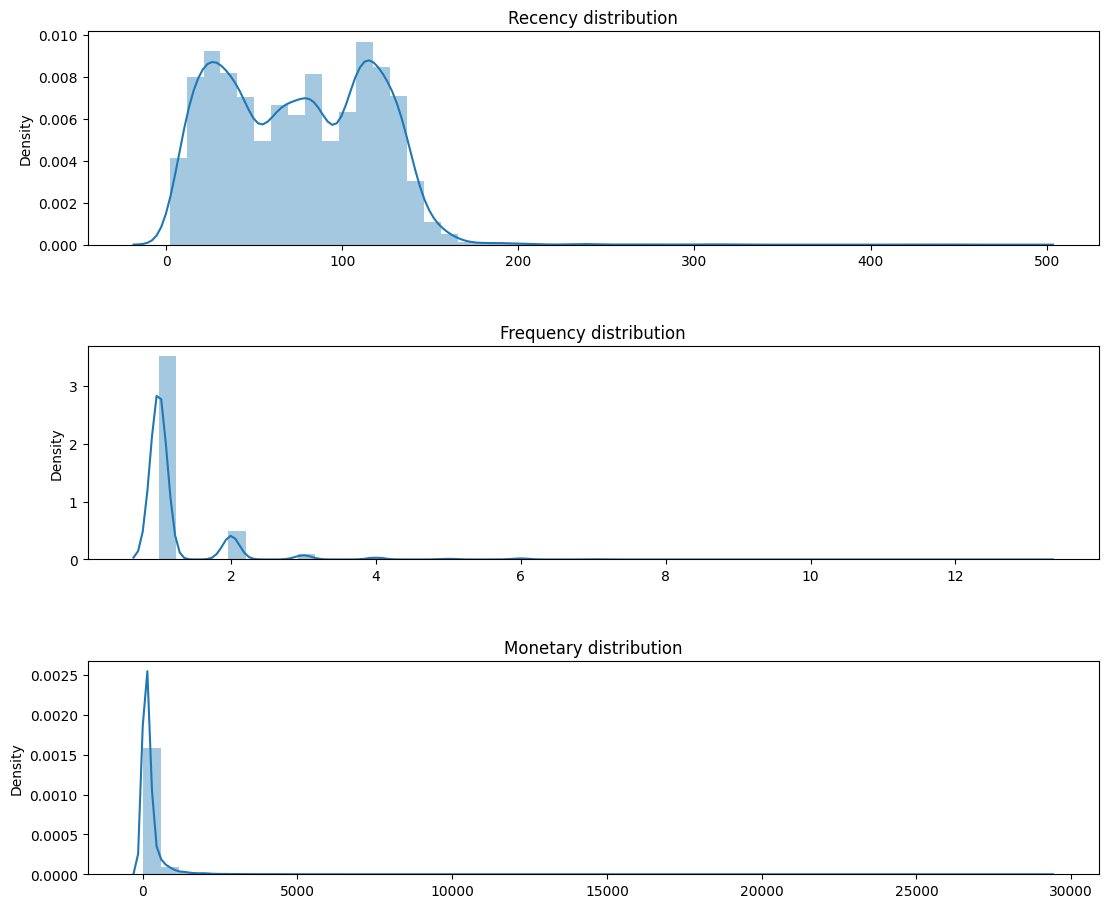

In [164]:
plt.figure(figsize=(12, 10))

#Recency
plt.subplot(3, 1, 1)
sns.distplot(rfm['recency'])
plt.title('Recency distribution')
plt.xlabel(None)

#Frequency
plt.subplot(3, 1, 2)
sns.distplot(rfm['frequency'])
plt.title('Frequency distribution')
plt.xlabel(None)

#Monetary
plt.subplot(3, 1, 3)
sns.distplot(rfm['monetary'])
plt.title('Monetary distribution')
plt.xlabel(None)

plt.tight_layout(pad = 4)

## Detecting outliers

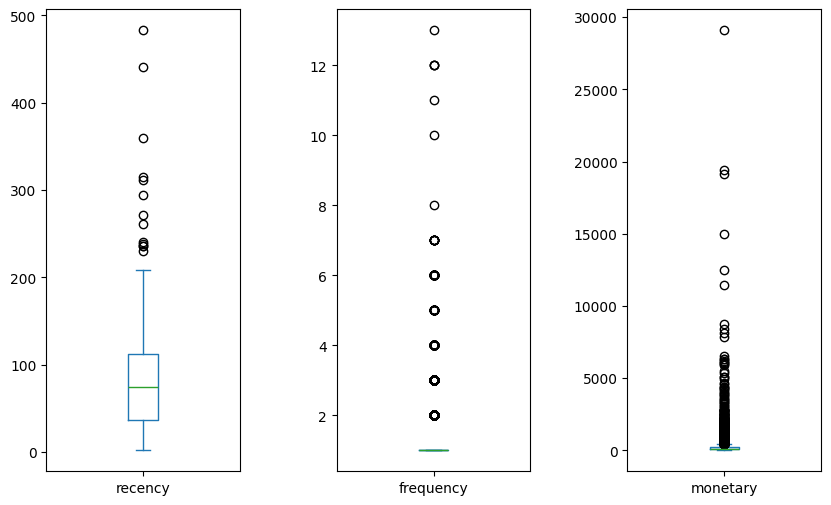

In [165]:
rfm.plot(
    kind='box', 
    subplots=True, 
    sharey=False, 
    figsize=(10, 6)
)

# increase spacing between subplots
plt.subplots_adjust(wspace=0.5) 
plt.show()

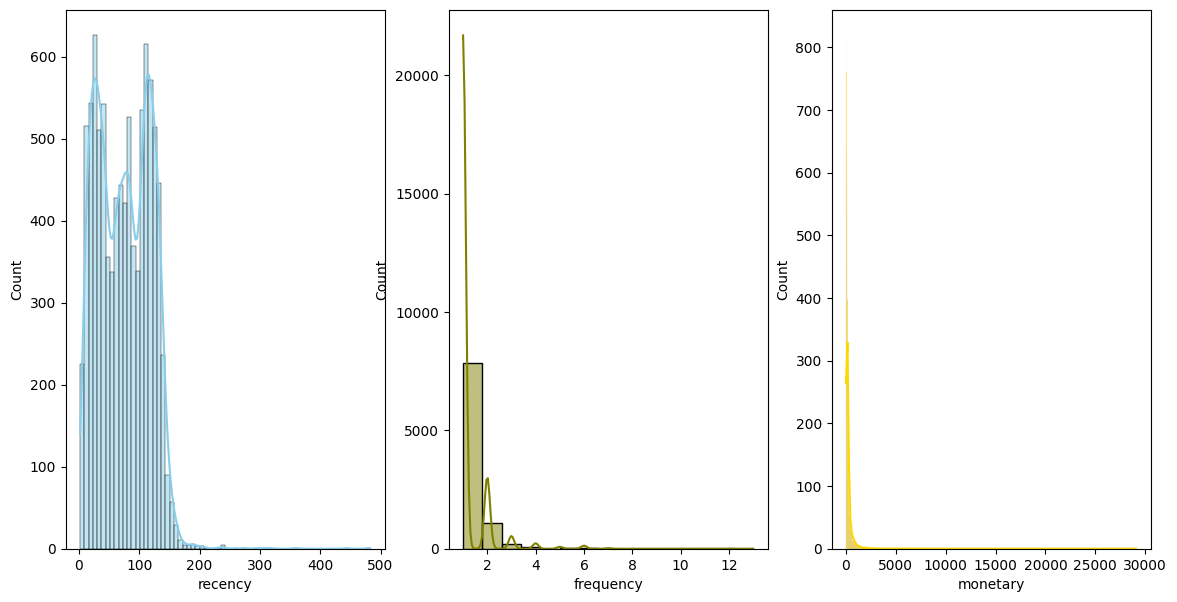

In [167]:
fig, axs = plt.subplots(1, 3, figsize=(14, 7))

sns.histplot(data=rfm, x="recency", kde=True, color="skyblue", ax=axs[0])
sns.histplot(data=rfm, x="frequency", kde=True, color="olive", ax=axs[1])
sns.histplot(data=rfm, x="monetary", kde=True, color="gold", ax=axs[2])

plt.show()

## Removing ouliners

In [168]:
# Calculate Z scores to normalize the data
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(rfm))
print(z)

                                   recency  frequency  monetary
customer_unique_id                                             
0000366f3b9a7992bf8c76cfdf3221e2  0.895684   0.331572  0.161318
000ec5bff359e1c0ad76a81a45cb598f  1.525878   0.331572  0.339174
00172711b30d52eea8b313a7f2cced02  0.961630   0.331572  0.190961
001928b561575b2821c92254a2327d06  1.619919   1.059778  0.131988
0019e8c501c85848ac0966d45226fa1d  1.107276   0.331572  0.073950
...                                    ...        ...       ...
ffeb904468642a1ce663a322629801cb  0.232811   0.331572  0.236205
ffecceca389973ef16660d58696f281e  1.248338   0.331572  0.268968
fff2ae16b99c6f3c785f0e052f2a9cfb  1.365890   0.331572  0.069270
fff3e1d7bc75f11dc7670619b2e61840  0.773548   0.331572  0.253366
ffff5962728ec6157033ef9805bacc48  1.060256   0.331572  0.173799

[9324 rows x 3 columns]


In [169]:
rfm_clean = rfm[(z < 3).all(axis=1)]

In [170]:
rfm.shape

(9324, 3)

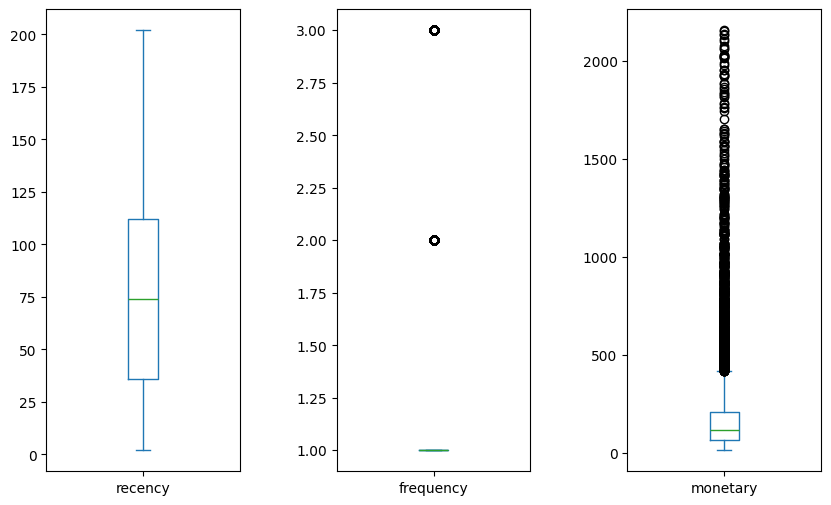

In [171]:
# Create box plots to check for outliers
rfm_clean.plot(
    kind='box', 
    subplots=True, 
    sharey=False, 
    figsize=(10, 6)
)

# increase spacing between subplots
plt.subplots_adjust(wspace=0.5) 
plt.show()

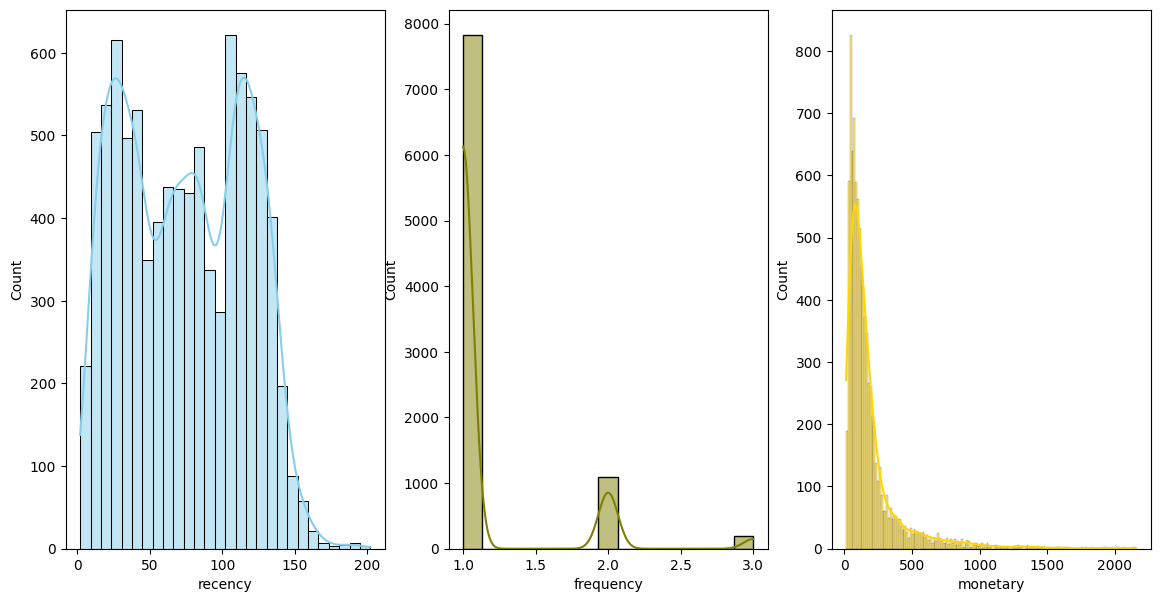

In [173]:
fig, axs = plt.subplots(1, 3, figsize=(14, 7))

sns.histplot(data=rfm_clean, x="recency", kde=True, color="skyblue", ax=axs[0])
sns.histplot(data=rfm_clean, x="frequency", kde=True, color="olive", ax=axs[1])
sns.histplot(data=rfm_clean, x="monetary", kde=True, color="gold", ax=axs[2])

plt.show()

## RFM Scorce

In [174]:
rfm["recency_score"] = pd.qcut(rfm['recency'], 5, labels=[5, 4, 3, 2, 1])
rfm["monetary_score"] = pd.qcut(rfm['monetary'], 5, labels=[1, 2, 3, 4, 5])

In [175]:
rfm['frequency'].value_counts(normalize=True)*100

frequency
1     84.191334
2     11.829687
3      2.091377
4      0.890176
6      0.504076
5      0.321750
7      0.096525
12     0.032175
13     0.010725
10     0.010725
11     0.010725
8      0.010725
Name: proportion, dtype: float64

In [176]:
#Creating a function to parse values
def parse_values(x):
    switch = {
        1: 1,
        2: 2,
        3: 3,
        4: 4
    }
    return switch.get(x, 5)
#Apply function to create frequency_score column
rfm['frequency_score'] = rfm['frequency'].apply(parse_values)

In [178]:
quintiles = rfm_clean[['recency', 'frequency', 'monetary']].quantile([.2, .4, .6, .8]).to_dict()
quintiles

{'recency': {0.2: 30.0, 0.4: 59.0, 0.6: 88.0, 0.8: 117.0},
 'frequency': {0.2: 1.0, 0.4: 1.0, 0.6: 1.0, 0.8: 1.0},
 'monetary': {0.2: 58.0, 0.4: 96.0, 0.6: 147.0, 0.8: 244.0}}

In [179]:
rfm['rfm_score'] = rfm.recency_score.astype(str)+ rfm.frequency_score.astype(str) + rfm.monetary_score.astype(str)

#Show results
rfm.head()

,recency,frequency,monetary,recency_score,monetary_score,frequency_score,rfm_score
customer_unique_id,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,113,1,141,2,3,1,213
000ec5bff359e1c0ad76a81a45cb598f,10,1,27,5,1,1,511
00172711b30d52eea8b313a7f2cced02,34,1,122,4,3,1,413
001928b561575b2821c92254a2327d06,6,2,329,5,5,2,525
0019e8c501c85848ac0966d45226fa1d,122,1,197,1,4,1,114


In [180]:
#Creating dictionary with scores and segment names
segments = {
    r'111|112|121|131|141|151': 'Lost customers',
    r'332|322|233|232|223|222|132|123|122|212|211': 'Hibernating customers', 
    r'155|154|144|214|215|115|114|113': 'Cannot Lose Them',
    r'255|254|245|244|253|252|243|242|235|234|225|224|153|152|145|143|142|135|134|133|125|124': 'At Risk',
    r'331|321|312|221|213|231|241|251': 'About To Sleep',
    r'535|534|443|434|343|334|325|324': 'Need Attention',
    r'525|524|523|522|521|515|514|513|425|424|413|414|415|315|314|313': 'Promising',
    r'512|511|422|421|412|411|311': 'New Customers',
    r'553|551|552|541|542|533|532|531|452|451|442|441|431|453|433|432|423|353|352|351|342|341|333|323': 'Potential Loyalist',
    r'543|444|435|355|354|345|344|335': 'Loyal',
    r'555|554|544|545|454|455|445': 'Champions'
}

In [181]:
#Creating segment column
rfm['segment'] = rfm['rfm_score'].replace(segments, regex=True)

#Show results
rfm.head()

,recency,frequency,monetary,recency_score,monetary_score,frequency_score,rfm_score,segment
customer_unique_id,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,113,1,141,2,3,1,213,About To Sleep
000ec5bff359e1c0ad76a81a45cb598f,10,1,27,5,1,1,511,New Customers
00172711b30d52eea8b313a7f2cced02,34,1,122,4,3,1,413,Promising
001928b561575b2821c92254a2327d06,6,2,329,5,5,2,525,Promising
0019e8c501c85848ac0966d45226fa1d,122,1,197,1,4,1,114,Cannot Lose Them


In [182]:
#Calculate some calculations grouping each segment
rfm_statistics = rfm[["segment", "recency", "frequency", "monetary"]].groupby("segment").agg(['mean','median', 'min', 'max', 'count'])

#Show results
rfm_statistics

recency                        frequency             \
                             mean median  min  max count      mean median min   
segment                                                                         
About To Sleep          89.767677   88.0   61  117   693  1.051948    1.0   1   
At Risk                118.045361  116.0   89  315   485  2.529897    2.0   2   
Cannot Lose Them       123.239917  122.0   89  483  1438  1.068150    1.0   1   
Champions               31.239130   31.5    7   57    46  5.130435    5.0   4   
Hibernating customers  105.362176  106.0   62  160   809  1.126082    1.0   1   
Lost customers         132.550898  129.0  118  441   668  1.026946    1.0   1   
Loyal                   65.979167   70.0   31   88    96  3.718750    3.0   3   
Need Attention          66.615721   73.0    3   88   229  2.174672    2.0   2   
New Customers           38.733676   35.0    2   88  1945  1.011825    1.0   1   
Potential Loyalist      54.532468   53.0   11   88    77  2.545455    2.0   2   
Promising               44.174419   41.0    2   88  2838  1.128259    1.0   1   

                                    monetary                           
                      max count         mean median  min    max count  
segment                                                                
About To Sleep          5   693    97.744589   97.0   26    151   693  
At Risk                12   485   792.400000  432.0   64  19457   485  
Cannot Lose Them       13  1438   331.578581  191.0   99  14963  1438  
Champions              11    46  2054.717391  878.5  212  29099    46  
Hibernating customers   3   809    65.312732   64.0   14    150   809  
Lost customers          4   668    59.901198   58.0   17     98   668  
Loyal                  12    96  1331.479167  797.5  195  12490    96  
Need Attention          3   229   551.860262  385.0  152   6512   229  
New Customers           2  1945    56.267866   53.0   13     98  1945  
Potential Loyalist      7    77   113.883117  120.0   22    151    77  
Promising               2  2838   278.416843  178.0   21   4681  2838

In [184]:
#Creating new column with percentage of customers by segment
rfm_statistics['ratio'] = (100 * rfm_statistics['recency']["count"]/rfm_statistics['recency']["count"].sum()).round(2)

#Show results
rfm_statistics

recency                        frequency             \
                             mean median  min  max count      mean median min   
segment                                                                         
About To Sleep          89.767677   88.0   61  117   693  1.051948    1.0   1   
At Risk                118.045361  116.0   89  315   485  2.529897    2.0   2   
Cannot Lose Them       123.239917  122.0   89  483  1438  1.068150    1.0   1   
Champions               31.239130   31.5    7   57    46  5.130435    5.0   4   
Hibernating customers  105.362176  106.0   62  160   809  1.126082    1.0   1   
Lost customers         132.550898  129.0  118  441   668  1.026946    1.0   1   
Loyal                   65.979167   70.0   31   88    96  3.718750    3.0   3   
Need Attention          66.615721   73.0    3   88   229  2.174672    2.0   2   
New Customers           38.733676   35.0    2   88  1945  1.011825    1.0   1   
Potential Loyalist      54.532468   53.0   11   88    77  2.545455    2.0   2   
Promising               44.174419   41.0    2   88  2838  1.128259    1.0   1   

                                    monetary                           ratio  
                      max count         mean median  min    max count         
segment                                                                       
About To Sleep          5   693    97.744589   97.0   26    151   693   7.43  
At Risk                12   485   792.400000  432.0   64  19457   485   5.20  
Cannot Lose Them       13  1438   331.578581  191.0   99  14963  1438  15.42  
Champions              11    46  2054.717391  878.5  212  29099    46   0.49  
Hibernating customers   3   809    65.312732   64.0   14    150   809   8.68  
Lost customers          4   668    59.901198   58.0   17     98   668   7.16  
Loyal                  12    96  1331.479167  797.5  195  12490    96   1.03  
Need Attention          3   229   551.860262  385.0  152   6512   229   2.46  
New Customers           2  1945    56.267866   53.0   13     98  1945  20.86  
Potential Loyalist      7    77   113.883117  120.0   22    151    77   0.83  
Promising               2  2838   278.416843  178.0   21   4681  2838  30.44

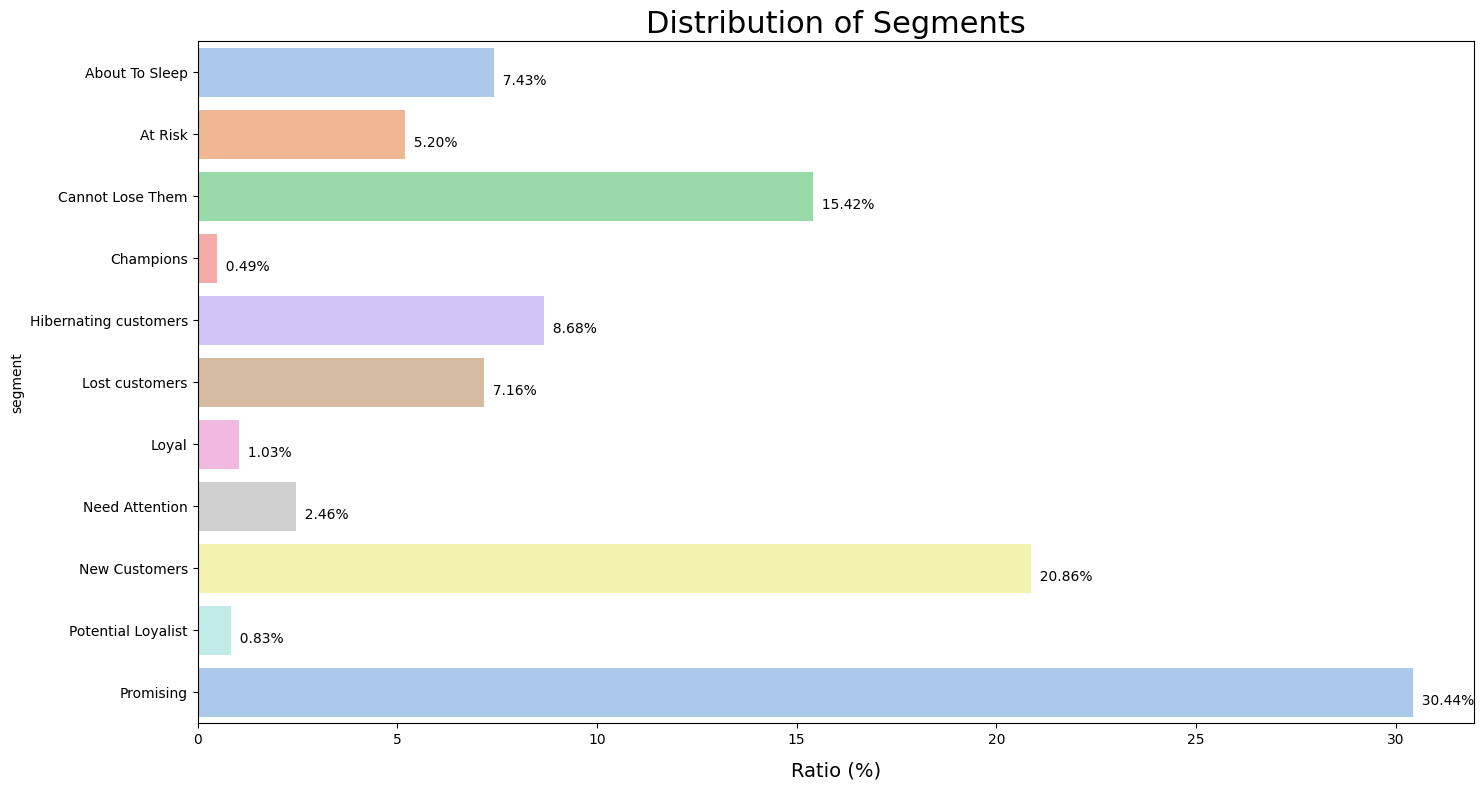

In [185]:
#Plot ratio column
plt.figure(figsize=(15,8))

plot = sns.barplot(x = 'ratio', y = rfm_statistics.index, data = rfm_statistics, palette = "pastel")

for i, v in enumerate(rfm_statistics['ratio']):
    plot.text(v, i+.20,"  {:.2f}".format(v)+"%", color='black', ha="left")

plt.title('Distribution of Segments', fontsize=22)
plt.xlabel('Ratio (%)', fontsize=14, labelpad = 10)
plt.tight_layout()